In [37]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# change CWD to the current directory of jupyter notebook
DATA_FILE_PATH = 'C:\\Users\\houzhe\\jupyter\\GitHub\\StockAverageMoveAnalysis\\StockAverageMoveAnalysis'
DATA_TITLE = 'NDX'
os.chdir(DATA_FILE_PATH)

price_df = pd.read_csv('NDX_HistoricalData.csv')
price_df.head()

,Date,Close/Last,Open,High,Low
0,01/02/2024,16543.94,16667.30,16686.60,16453.15
1,12/29/2023,16825.93,16902.44,16919.51,16757.89
2,12/28/2023,16898.47,16963.52,16969.17,16891.32
3,12/27/2023,16906.80,16896.14,16922.01,16859.55
4,12/26/2023,16878.46,16816.78,16907.51,16813.57


In [38]:
price_df.set_index('Date', inplace=True)
price_df.head()

,Close/Last,Open,High,Low
Date,,,,
01/02/2024,16543.94,16667.30,16686.60,16453.15
12/29/2023,16825.93,16902.44,16919.51,16757.89
12/28/2023,16898.47,16963.52,16969.17,16891.32
12/27/2023,16906.80,16896.14,16922.01,16859.55
12/26/2023,16878.46,16816.78,16907.51,16813.57


Text(0, 0.5, 'NDX')

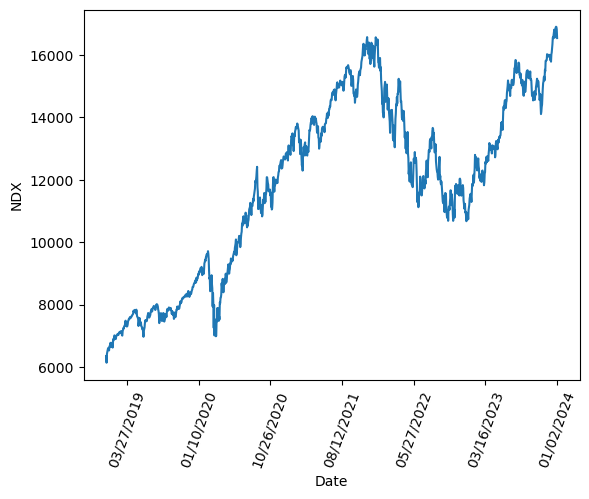

In [41]:
plt.gca().invert_xaxis()
price_df['Close/Last'].plot(rot=70);
plt.ylabel(DATA_TITLE)